In [21]:
from tensorflow.keras.layers  import Dense, Conv2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2
import zipfile

In [3]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"danielreyesdhats","key":"546f8b8a22d19b7001b860532f3a07c1"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [10]:
!kaggle datasets download -d grassknoted/asl-alphabet

asl-alphabet.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
local_zip = "/content/asl-alphabet.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
file_extract = "/content/asl-alphabet"
zip_ref.extractall(file_extract) 
zip_ref.close()

In [12]:
features = []
labels = []

classes = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z", 'del','nothing','space']
n_classes=len(classes)
for i in range(len(classes)):
    file_list = glob.glob("/content/asl-alphabet/asl_alphabet_train/asl_alphabet_train/" + classes[i] + "/*.jpg")
    for item in range(500):
        features.append(file_list[item])
        labels.append([i])
print("Dataset Feature size : ",len(features))
print("Dataset labels size : ",len(labels))

Dataset Feature size :  14500
Dataset labels size :  14500


In [13]:
features,labels = shuffle(features,labels,random_state=0)

In [20]:
data = []
for ima in features:
  data.append(cv2.imread(ima))

In [25]:
del data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=0.7)
print("Train data : ",len(X_train),len(y_train))
print("Validation data : ",len(X_test),len(y_test))

Train data :  10150 10150
Validation data :  4350 4350


In [23]:
input_dim = X_train[0].shape
input_dim

(200, 200, 3)

In [24]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(4,4), activation='relu', input_shape=input_dim))
model.add(Conv2D(64, kernel_size=(4,4), strides=2, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(128, kernel_size=(4,4), strides=1, activation='relu'))
model.add(Conv2D(128, kernel_size=(4,4), strides=2, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(256, kernel_size=(4,4), strides=1, activation='relu'))
model.add(Conv2D(256, kernel_size=(4,4), strides=2, activation='relu'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 197, 197, 64)      3136      
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        65600     
                                                                 
 dropout (Dropout)           (None, 97, 97, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 94, 94, 128)       131200    
                                                                 
 conv2d_3 (Conv2D)           (None, 46, 46, 128)       262272    
                                                                 
 dropout_1 (Dropout)         (None, 46, 46, 128)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 43, 43, 256)       5

In [26]:
X_train = np.array(X_train)
y_train = np.array(y_train) 
X_test = np.array(X_test)
y_test = np.array(y_test)

In [27]:
history = model.fit(X_train,
          y_train,
          epochs=10,
          validation_data = (X_test,y_test))

Epoch 1/10
318/318 [==============================] - 121s 342ms/step - loss: 4.1588 - accuracy: 0.0763 - val_loss: 3.0058 - val_accuracy: 0.1720
Epoch 2/10
318/318 [==============================] - 106s 333ms/step - loss: 2.4785 - accuracy: 0.2962 - val_loss: 1.8818 - val_accuracy: 0.4379
Epoch 3/10
318/318 [==============================] - 106s 334ms/step - loss: 1.3430 - accuracy: 0.5997 - val_loss: 1.0732 - val_accuracy: 0.6775
Epoch 4/10
318/318 [==============================] - 107s 337ms/step - loss: 0.6379 - accuracy: 0.8010 - val_loss: 0.9794 - val_accuracy: 0.7168
Epoch 5/10
318/318 [==============================] - 104s 328ms/step - loss: 0.3165 - accuracy: 0.9021 - val_loss: 0.7816 - val_accuracy: 0.8145
Epoch 6/10
318/318 [==============================] - 110s 345ms/step - loss: 0.1630 - accuracy: 0.9474 - val_loss: 0.9106 - val_accuracy: 0.8168
Epoch 7/10
318/318 [==============================] - 107s 337ms/step - loss: 0.1108 - accuracy: 0.9649 - val_loss: 1.0659 -

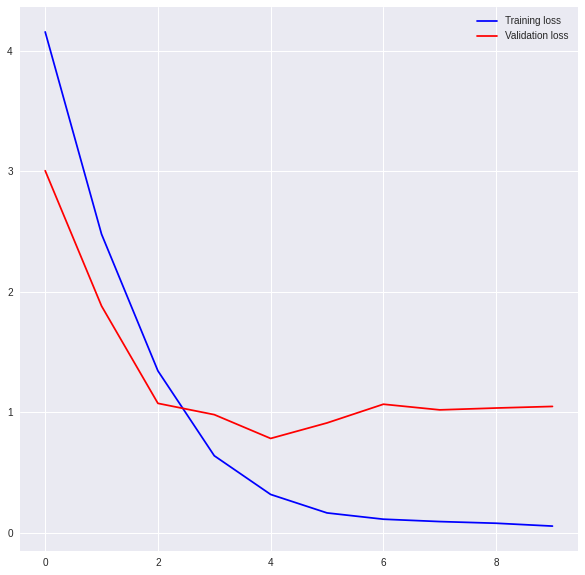

<Figure size 576x396 with 0 Axes>

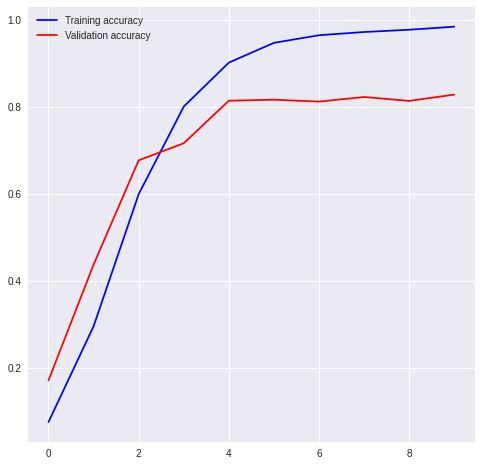

In [28]:
plt.style.use('seaborn')
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend()
plt.show()

In [31]:
y_pred = np.argmax(model.predict(X_test),1)
print("Precision : {:.2f} %".format(precision_score(y_pred,y_test,average='macro')))
print("Recall    : {:.2f} %".format(recall_score(y_pred,y_test,average='macro')))
print("F1 Score  : {:.2f} %".format(f1_score(y_pred,y_test,average='macro')))

Precision : 0.83 %
Recall    : 0.83 %
F1 Score  : 0.83 %


In [32]:
model.save('model.h5')

In [33]:
!pip install tensorflowjs

     |████████████████████████████████| 77 kB 6.4 MB/s 


In [34]:
!mkdir carpeta_salida

In [36]:
!tensorflowjs_converter --input_format keras model.h5 carpeta_salida